In [1]:
# Import required packages
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### Gathering Data

#### 1. Twitter Archive

In [2]:
# Read csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2.  Image Predictions

In [5]:
# Downloading and saving the image predictions data programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open (file_name, 'wb') as f:
        f.write(response.content)
        
# Read tsv file
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# Identify data of interest in txt file and put it in a dataframe
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.sample(10)

,favorite_count,retweet_count,tweet_id,user_count
1706,3134,1182,680798457301471234,3200952
1026,4437,1207,745789745784041472,3200943
2082,1234,546,670807719151067136,3201008
664,9158,2203,790698755171364864,3200901
70,19763,4319,878776093423087618,3200892
2320,330,204,666430724426358785,3201017
1306,3022,903,707297311098011648,3200947
2260,355,138,667546741521195010,3201016
1205,5093,1920,715733265223708672,3200945
1045,8671,4185,743510151680958465,3200943


In [8]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


### Assessing Data

#### Visual Assessment

##### 1. Twitter Archive

In [9]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### 2. Image Predictions

In [10]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### 3. Twitter API

In [11]:
api_df

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


#### Programatic Assessment

##### 1. Twitter Archive

In [12]:
archive_df.shape

(2356, 17)

In [13]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None


In [14]:
sum(archive_df['tweet_id'].duplicated())

0

In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
archive_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [18]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
#Checking the text of some numerator ratings
print(archive_df.loc[archive_df.rating_numerator == 144, 'text'])
print(archive_df.loc[archive_df.rating_numerator == 143, 'text'])
print(archive_df.loc[archive_df.rating_numerator == 666, 'text'])
print(archive_df.loc[archive_df.rating_numerator == 960, 'text'])
print(archive_df.loc[archive_df.rating_numerator == 204, 'text'])

1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [20]:
#Print whole text for further investigation
print(archive_df['text'][1779]) #12 dogs
print(archive_df['text'][1634]) #13 dogs
print(archive_df['text'][189]) #no image, remove 
print(archive_df['text'][313]) #tweet explaining rating, remove
print(archive_df['text'][1120]) #17 dogs

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [21]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
#Checking the text of some denominator ratings
print(archive_df.loc[archive_df.rating_denominator == 11, 'text'])
print(archive_df.loc[archive_df.rating_denominator == 2, 'text'])
print(archive_df.loc[archive_df.rating_denominator == 16, 'text'])
print(archive_df.loc[archive_df.rating_denominator == 15, 'text'])
print(archive_df.loc[archive_df.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [23]:
#Print whole text for further investigation
print(archive_df['text'][784]) #retweet, removed while cleaning
print(archive_df['text'][1068]) #correct rating should be 14/10
print(archive_df['text'][1662]) #correct rating should be 10/10
print(archive_df['text'][2335]) #correct rating should be 9/10
print(archive_df['text'][1663]) #tweet explaining rating, remove
print(archive_df['text'][342]) #no rating or image, remove
print(archive_df['text'][516]) #no rating, remove

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


##### 2. Image Predictions

In [24]:
image_predictions_df.shape

(2075, 12)

In [25]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
55,667062181243039745,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,True,vizsla,0.090998,True,kelpie,0.022956,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True
1591,798665375516884993,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True


In [26]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
sum(image_predictions_df['tweet_id'].duplicated())

0

In [28]:
sum(image_predictions_df['jpg_url'].duplicated())

66

In [29]:
print(image_predictions_df.p1.value_counts())
print(image_predictions_df.p1_dog.value_counts())

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [30]:
print(image_predictions_df.p2.value_counts())
print(image_predictions_df.p2_dog.value_counts())

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
chow                               20
malinois                           20
miniature_pinscher                 20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [31]:
print(image_predictions_df.p3.value_counts())
print(image_predictions_df.p3_dog.value_counts())

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [32]:
image_predictions_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [33]:
image_predictions_df.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [34]:
image_predictions_df.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

##### 3. Twitter API

In [35]:
api_df.sample(5)

,favorite_count,retweet_count,tweet_id,user_count
1442,2613,757,696713835009417216,3200950
2009,733,169,672245253877968896,3201006
99,15029,3884,872820683541237760,3200891
464,0,9907,817181837579653120,3200895
1635,2108,595,684195085588783105,3200952


In [36]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [37]:
sum(api_df['tweet_id'].duplicated())

0

In [38]:
api_df.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [39]:
api_df.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

### Assessment Summary

#### Tidiness Issues:

- All tables should be part of one master dataset then duplicate columns should be removed

a. archive_df
- values are column names (doggo, floofer, pupper, puppo)
- `timestamp` column should be `date` and `time` columns

#### Quality Issues:

a. archive_df
- retweets (3 tables)
- `tweet_id` dtype should be a string
- inaccurate `name` data
- inaccurate dog ratings (`numerator` and `denominator` data)
- some columns aren't useful for analysis

b. image_predictions
- 66 duplicated urls
- Various columns for dog breed predictions and their confidence levels
- tweets with no images
- some columns aren't useful for analysis



### Cleaning Data

In [40]:
#Make copies for cleaning
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

#### Tidiness Issues

#### *Define*
Merge the 3 datasets into one using `concat` function then remove duplicate columns

#### *Code*

In [41]:
#Merging all copies into one dataset
master_df = pd.concat([archive_df_clean,image_predictions_df_clean,api_df_clean], join='outer', axis=1)

In [42]:
#Removing duplicate columns
master_df = master_df.loc[:,~master_df.columns.duplicated()]

#### *Test*

In [43]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,user_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,3200889.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,3200889.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,3200889.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,3200889.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,3200889.0


In [44]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [45]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'user_count'],
      dtype='object')

#### *Define*
Create one column to include the values (doggo, floofer, pupper, puppo) using `extract` function, then drop the values columns

#### *Code*

In [46]:
#Extracting text from 4 columns into 1 dog_stage column
master_df['dog_stage'] = master_df['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### *Test*

In [47]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,user_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,3200889.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,3200889.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,3200889.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,3200889.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,3200889.0,NaN


In [48]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [49]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'user_count', 'dog_stage'],
      dtype='object')

In [50]:
master_df.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### *Define*
Convert `timestamp` column into datetime format using `to_datetime` function then convert `timestamp` column into `date` and `time` columns

#### *Code*

In [51]:
#Converting timestamp to datetime
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])

In [52]:
#Converting timestamp column into date and time columns
master_df['date'] = master_df['timestamp'].dt.date
master_df['time'] = master_df['timestamp'].dt.time

#### *Test*

In [53]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'user_count', 'dog_stage', 'date', 'time'],
      dtype='object')

In [54]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,user_count,dog_stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,3200889.0,NaN,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,3200889.0,NaN,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,bloodhound,0.116197,True,25461.0,4328.0,3200889.0,NaN,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,miniature_pinscher,0.222752,True,42908.0,8964.0,3200889.0,NaN,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Doberman,0.154629,True,41048.0,9774.0,3200889.0,NaN,2017-07-29,16:00:24


In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                 

#### Quality Issues

#### *Define*
Keep only original tweets (delete all retweets) by filtering NaN values in the `retweeted_status_user_id` column

#### *Code*

In [56]:
#Deleting retweets
master_df = master_df[pd.isnull(master_df['retweeted_status_user_id'])]

#### *Test*

In [57]:
sum(master_df.retweeted_status_user_id.value_counts())

0

In [58]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       

#### *Define*
Change `tweet_id` dtype from *int* to *str*

#### *Code*

In [59]:
#Changing tweet_id dypt to a string
master_df['tweet_id'] = master_df['tweet_id'].astype(str)

#### *Test*

In [60]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                      

#### Define
Change inaccurate `name` data to None

#### *Code*

In [61]:
master_df.name = master_df.name.str.replace('^[a-z]+', 'None')

#### *Test*

In [62]:
master_df.name.value_counts()

None         784
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Bella          6
Bailey         6
Koda           6
Oscar          6
Jax            6
Stanley        6
Bo             6
Dave           5
Rusty          5
Bentley        5
Scout          5
Leo            5
Louis          5
Buddy          5
Chester        5
Milo           5
Cassie         4
Archie         4
            ... 
Gòrdón         1
Pluto          1
Tuco           1
Colin          1
Kathmandu      1
Tanner         1
Opie           1
Tyrone         1
Kulet          1
Clifford       1
Claude         1
Ron            1
Dotsy          1
Cedrick        1
Fido           1
Gromit         1
Ferg           1
Keet           1
Clarkus        1
Jeffrie        1
Noosh          1
Boston         1
Tater          1
Vinscent       1
Wesley         1
Tedders        1
Levi           1
Pepper        

In [63]:
master_df.name.sample(15)

971        Lilah
1104     Buckley
1057      Edmund
1671        Kreg
39          Lola
2190      Jaycob
1170    Berkeley
217          Leo
2329        None
1375       Bilbo
859        Clark
1255        None
168         None
2098     Jeffrie
1795       Tassy
Name: name, dtype: object

#### *Define*
Fix dog ratings (numerator and denominator issues)

#### *Code 1*

In [64]:
#Changig ratings dtype to float
master_df[['rating_numerator','rating_denominator']] = master_df[['rating_numerator','rating_denominator']].astype(float)

#### *Test 1*

In [65]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                  

#### *Code 2*

In [66]:
#Iterating to gather all text, indices and ratings that include a decimal in their numerator
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in master_df['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+',text).group())

#### *Test 2*

In [67]:
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [68]:
ratings_decimals_index

[45, 695, 763, 1689, 1712]

#### *Code 3*

In [69]:
#Fixing numerators
#Changing decimal ratings dtype to float
master_df.loc[ratings_decimals_index[0], 'rating_numerator'] = float(ratings_decimals[0])
master_df.loc[ratings_decimals_index[1], 'rating_numerator'] = float(ratings_decimals[1])
master_df.loc[ratings_decimals_index[2], 'rating_numerator'] = float(ratings_decimals[2])
master_df.loc[ratings_decimals_index[3], 'rating_numerator'] = float(ratings_decimals[3])
master_df.loc[ratings_decimals_index[4], 'rating_numerator'] = float(ratings_decimals[4])

#### *Test 3*

In [70]:
master_df.loc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-08 00:28:19
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

In [71]:
master_df.loc[1712]

tweet_id                                                     680494726643068929
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2015-12-25 21:06:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have uncovered an entire battalion of ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/680494726...
rating_numerator                                                          11.26
rating_denominator                                                           10
name                                    

In [72]:
master_df.loc[30]

tweet_id                                                     886267009285017600
in_reply_to_status_id                                               8.86266e+17
in_reply_to_user_id                                                 2.28118e+09
timestamp                                                   2017-07-15 16:51:35
source                        <a href="http://twitter.com/download/iphone" r...
text                          @NonWhiteHat @MayhewMayhem omg hello tanner yo...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

#### *Code 4*

In [73]:
#Fixing inaccurate denominators
master_df.loc[(master_df.index == 1068), 'rating_denominator'] = 10
master_df.loc[(master_df.index == 1662), 'rating_denominator'] = 10
master_df.loc[(master_df.index == 2335), 'rating_denominator'] = 10

#Removing tweets with no ratings
master_df.drop(index=[313,1663,342,516,979], inplace=True)

#### *Test 4*

In [74]:
with pd.option_context('max_colwidth', 200):
    display(master_df[master_df['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


#### *Code 5*

In [75]:
#Creating a new rating column that includes both values of numerator and denominator
master_df['rating'] = 10 * master_df['rating_numerator']/master_df['rating_denominator']

#### *Test 5*

In [76]:
master_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,user_count,dog_stage,date,time,rating
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,...,flat-coated_retriever,0.015579,True,1269.0,572.0,3201006.0,NaN,2015-12-02,00:58:41,8.0
1279,708845821941387268,NaN,NaN,2016-03-13 02:43:08,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708845821...,...,Pekinese,0.008072,True,18036.0,7848.0,3200947.0,pupper,2016-03-13,02:43:08,9.0
1151,725842289046749185,NaN,NaN,2016-04-29 00:21:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Colby. He's currently regretting all t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289...,...,golden_retriever,0.000360,True,5646.0,2009.0,3200945.0,NaN,2016-04-29,00:21:01,12.0
265,842115215311396866,NaN,NaN,2017-03-15 20:48:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. It's his first time going to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842115215...,...,toy_terrier,0.196279,True,0.0,17504.0,3200891.0,NaN,2017-03-15,20:48:07,12.0
1142,727524757080539137,NaN,NaN,2016-05-03 15:46:33,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727524757...,...,passenger_car,0.052665,False,3324.0,920.0,3200945.0,pupper,2016-05-03,15:46:33,10.0
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762464539...,...,Norfolk_terrier,0.007027,True,35400.0,17919.0,3200908.0,NaN,2016-08-08,01:44:46,12.0
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763...,...,NaN,NaN,NaN,250.0,64.0,3201011.0,NaN,2015-11-26,18:16:16,11.0
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,...,Greater_Swiss_Mountain_dog,0.103900,True,19250.0,6238.0,3200901.0,doggo,2016-10-03,01:00:34,11.0
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,...,teddy,0.102595,False,1460.0,521.0,3201004.0,NaN,2015-12-07,02:21:29,9.0
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,...,Labrador_retriever,0.008847,True,0.0,12953.0,3200894.0,NaN,2017-01-24,17:04:50,12.0


#### *Define*
Drop 66 duplicated `jpg_url`

#### *Code*

In [77]:
#Dropping jpg_url duplicates
master_df.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### *Test*

In [78]:
sum(master_df['jpg_url'].duplicated())

0

#### *Define*
Create 1 column for `dog_breed` and 1 column for `conf_lvl`

#### *Code*

In [79]:
#Creating a function to store dog_breed and conf_lvl from image predictions
dog_breed = []
conf_lvl = []

def image_prediction(master_df):
    if master_df['p1_dog'] == True:
        dog_breed.append(master_df['p1'])
        conf_lvl.append(master_df['p1_conf'])
    elif master_df['p2_dog'] == True:
        dog_breed.append(master_df['p2'])
        conf_lvl.append(master_df['p2_conf'])
    elif master_df['p3_dog'] == True:
        dog_breed.append(master_df['p3'])
        conf_lvl.append(master_df['p3_conf'])
    else:
        dog_breed.append('not_recognized')
        conf_lvl.append('not_recognized')
        
#Applying function to master_df
master_df.apply(image_prediction, axis=1)

#Creating new columns
master_df['dog_breed'] = dog_breed
master_df['conf_lvl'] = conf_lvl

#### *Test*

In [80]:
master_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_dog,favorite_count,retweet_count,user_count,dog_stage,date,time,rating,dog_breed,conf_lvl
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,...,True,2937.0,606.0,3200947.0,NaN,2016-03-19,01:11:29,12.0,Samoyed,0.998201
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When bae calls your name from across the room....,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,...,True,1274.0,138.0,3200950.0,NaN,2016-01-10,20:41:33,12.0,Siberian_husky,0.703224
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,...,True,10989.0,3220.0,3200895.0,doggo,2016-12-25,19:00:02,11.0,Labrador_retriever,0.868367
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,...,True,0.0,19297.0,3200890.0,NaN,2017-07-13,15:19:09,14.0,Chihuahua,0.671853
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,...,False,22594.0,5476.0,3200890.0,NaN,2017-02-22,17:41:18,12.0,dalmatian,0.114259


In [81]:
master_df.dog_breed.value_counts()

not_recognized                    279
golden_retriever                  148
Labrador_retriever                 97
Chihuahua                          85
Pembroke                           84
pug                                61
toy_poodle                         49
chow                               45
Samoyed                            39
Pomeranian                         38
Chesapeake_Bay_retriever           31
French_bulldog                     29
malamute                           29
cocker_spaniel                     26
miniature_pinscher                 25
Eskimo_dog                         21
Cardigan                           21
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     19
beagle                             18
kuvasz                             18
Shih-Tzu                           16
Rottweiler                         16
Lakeland_terrier                   16
basset                             16
Maltese_dog 

#### *Define*
Remove tweets with no images

#### *Code*

In [82]:
#Removing rows with dog_breed and conf_lvl not recognized
master_df = master_df[master_df['dog_breed'] != 'not_recognized']

#### *Test*

In [83]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2073
Data columns (total 37 columns):
tweet_id                      1551 non-null object
in_reply_to_status_id         56 non-null float64
in_reply_to_user_id           56 non-null float64
timestamp                     1551 non-null datetime64[ns]
source                        1551 non-null object
text                          1551 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1510 non-null object
rating_numerator              1551 non-null float64
rating_denominator            1551 non-null float64
name                          1551 non-null object
doggo                         1551 non-null object
floofer                       1551 non-null object
pupper                        1551 non-null object
puppo                         1551 non-null object
jpg_url                  

In [84]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'user_count', 'dog_stage', 'date', 'time', 'rating', 'dog_breed',
       'conf_lvl'],
      dtype='object')

#### *Define*
Drop columns unuseful for analysis

##### *Code*

In [85]:
master_df.drop(columns=['in_reply_to_status_id', 
                'in_reply_to_user_id',
                'timestamp',
                'source',
                'retweeted_status_id', 
                'retweeted_status_user_id',       
                'retweeted_status_timestamp', 
                'expanded_urls', 
                'rating_numerator',
                'rating_denominator', 
                'doggo', 
                'floofer', 
                'pupper', 
                'puppo', 
                'img_num', 
                'p1', 
                'p1_conf', 
                'p1_dog', 
                'p2', 
                'p2_conf',
                'p2_dog', 
                'p3', 
                'p3_conf', 
                'p3_dog'], inplace=True)

#### *Test*

In [86]:
master_df.head(0)

,tweet_id,text,name,jpg_url,favorite_count,retweet_count,user_count,dog_stage,date,time,rating,dog_breed,conf_lvl


In [87]:
master_df.columns

Index(['tweet_id', 'text', 'name', 'jpg_url', 'favorite_count',
       'retweet_count', 'user_count', 'dog_stage', 'date', 'time', 'rating',
       'dog_breed', 'conf_lvl'],
      dtype='object')

In [88]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id          1551 non-null object
text              1551 non-null object
name              1551 non-null object
jpg_url           1551 non-null object
favorite_count    1551 non-null float64
retweet_count     1551 non-null float64
user_count        1551 non-null float64
dog_stage         297 non-null object
date              1551 non-null object
time              1551 non-null object
rating            1551 non-null float64
dog_breed         1551 non-null object
conf_lvl          1551 non-null object
dtypes: float64(4), object(9)
memory usage: 169.6+ KB


### Storing Data

In [89]:
master_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

### Analyzing & Visualizing Data

#### Insights  & Visualizations
1. How does the total number of tweets change over time?

In [90]:
master_df['date'] = pd.to_datetime(master_df['date'])
master_df['date'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11     20
2015-12    334
2016-01    155
2016-02     97
2016-03    116
2016-04     49
2016-05     51
2016-06     83
2016-07     81
2016-08     55
2016-09     57
2016-10     59
2016-11     46
2016-12     50
2017-01     54
2017-02     51
2017-03     41
2017-04     35
2017-05     35
2017-06     38
2017-07     42
2017-08      2
Name: date, dtype: int64

In [91]:
tweet_change = master_df['tweet_id'].groupby([master_df['date'].dt.year, master_df['date'].dt.month]).count()

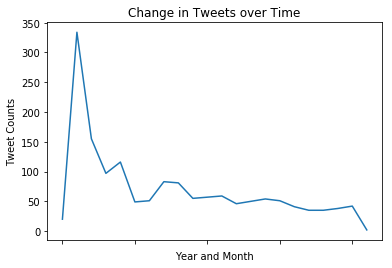

In [92]:
#Plotting tweets vs time
tweet_change.plot('line')
plt.title('Change in Tweets over Time')
plt.xlabel('Year and Month')
plt.ylabel('Tweet Counts');

#### Insights & Visualizations
2. Is there a relation between ratings and retweets?

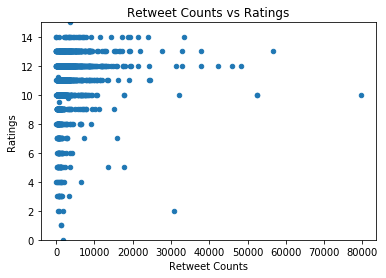

In [93]:
#Plotting retweet counts vs ratings
master_df.plot(x='retweet_count',y='rating',kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
axes = plt.gca()
axes.set_ylim([0,15])
plt.title('Retweet Counts vs Ratings');

#### Insights & Visualizations
3. What's the most frequent dog stage?

In [94]:
master_df.dog_stage.value_counts()

pupper     198
doggo       71
puppo       24
floofer      4
Name: dog_stage, dtype: int64

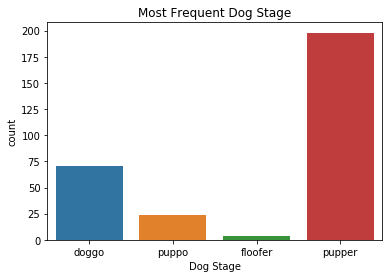

In [95]:
#Plotting dog stages
sns.countplot(data=master_df, x='dog_stage')
plt.title('Most Frequent Dog Stage')
plt.xlabel('Dog Stage');

#### Insights & Visualizations
4. What's the most popular dog breed?

In [96]:
master_df.dog_breed.value_counts()

golden_retriever                  148
Labrador_retriever                 97
Chihuahua                          85
Pembroke                           84
pug                                61
toy_poodle                         49
chow                               45
Samoyed                            39
Pomeranian                         38
Chesapeake_Bay_retriever           31
malamute                           29
French_bulldog                     29
cocker_spaniel                     26
miniature_pinscher                 25
Eskimo_dog                         21
Cardigan                           21
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     19
kuvasz                             18
beagle                             18
Shih-Tzu                           16
Lakeland_terrier                   16
Rottweiler                         16
Italian_greyhound                  16
basset                             16
Maltese_dog 

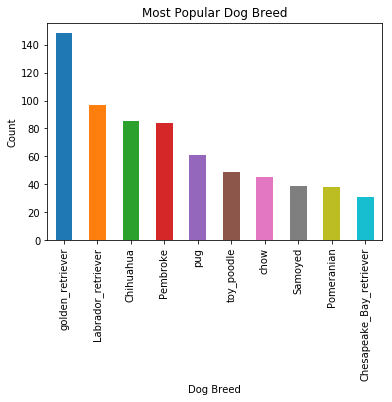

In [97]:
#Plotting dog breeds
master_df.dog_breed.value_counts()[0:10].sort_values(ascending=False).plot(kind='bar')
plt.title('Most Popular Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Count');